In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import joblib

**spaCy Model is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, vectors, syntax and entities.**

In [2]:
nlp=spacy.load("en_core_web_sm")

In [3]:
df=pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Data Cleaning

In [8]:
def text_process(message):
    doc=nlp(message)
    final=[token.lemma_ for token in doc if token.is_stop== False and token.text.isalpha()== True ]
    return " ".join(final)

In [9]:
text_process("Hello my name is Sudhanshu Kumar and I like playing Cricket!!!")

'hello Sudhanshu Kumar like play Cricket'

In [10]:
# toxic['text length'] = toxic['comment_text'].apply(len)  #adding a new feature

In [11]:
# processed=df["comment_text"].apply(text_process)

In [12]:
# df["filtered"]=processed

**exporting the new processed csv file**

In [13]:
# df.to_csv(r'/filtered_text.csv', index = False)

### Loading new dataframe with filtered text

In [18]:
df=pd.read_csv("filtered_text.csv")
df["filtered"]=df["filtered"].apply(lambda x: np.str_(x))

In [19]:
df.iloc[201]
# print(df.iloc[201].comment_text,"\n")

id                                                007f1839ada915e6
comment_text     Your blatant POV pushing \n\nNeither of you gu...
toxic                                                            1
severe_toxic                                                     0
obscene                                                          1
threat                                                           0
insult                                                           0
identity_hate                                                    0
filtered         blatant POV pushing guys contribution Italian ...
text length                                                    379
Name: 201, dtype: object

## Data Visualisation

In [20]:
sns.displot(df['text length'],bins=25)   #ylabel-> count of comments

In [21]:
fig,ax= plt.subplots(2,3,figsize=(16,10))  #returns a 2D array
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()    #returns an array of Axes objects
sns.countplot(x=df['toxic'],palette= 'magma',ax=ax1)
sns.countplot(x=df['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(x=df['obscene'], palette= 'Set2',ax=ax3)
sns.countplot(x=df['threat'], palette= 'viridis',ax = ax4)
sns.countplot(x=df['insult'], palette = 'Set3',ax=ax5)
sns.countplot(x=df['identity_hate'], palette = 'Set1', ax = ax6)

<AxesSubplot:xlabel='identity_hate', ylabel='count'>

## Feature Extraction

**Count Vectorizer**: a common technique for extracting features from text is to place all of the words that occur in the text in a bucket. This aproach is called a bag of words model or BoW for short. It’s referred to as a “bag” of words because any information about the structure of the sentence is lost.

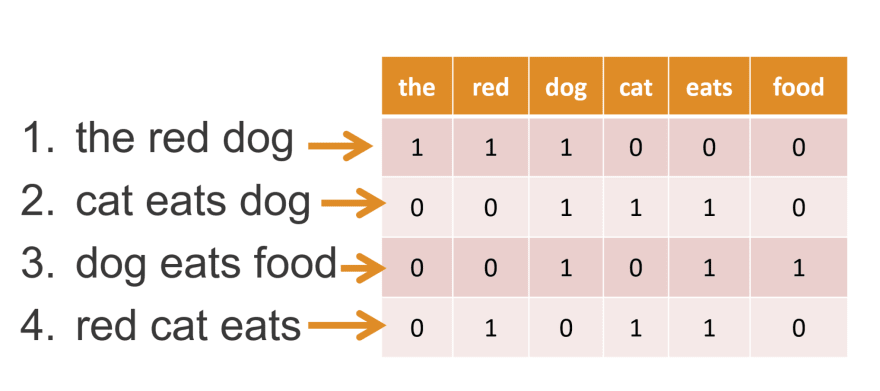


**TF-IDF Vectorizer**: It is a measure of a word orginality/relevant of by comparing the number of times a word appears in a doc with number of doc the word appears in

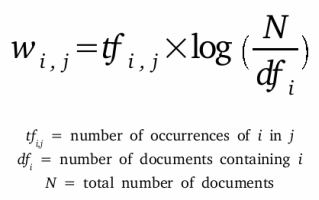

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

**max_df = 0.80 means "ignore terms that appear in more than 80% of the documents".**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
tfidf=TfidfVectorizer(max_df=0.8)

In [24]:
X=df["filtered"]
X_vec=tfidf.fit_transform(X)

In [37]:
print(X_vec)  # (rows, columns) TF-IDF value

  (0, 117310)	0.25091376668237186
  (0, 101217)	0.09050316768269731
  (0, 136445)	0.09283272038843154
  (0, 137803)	0.17101321266214992
  (0, 116066)	0.1499601301720491
  (0, 47564)	0.24414707641601813
  (0, 39301)	0.32989337154427456
  (0, 156489)	0.21209730283904113
  (0, 94592)	0.13141052284173838
  (0, 150136)	0.24253113274839233
  (0, 53915)	0.25091376668237186
  (0, 25894)	0.2830510229958944
  (0, 147856)	0.31380112887037037
  (0, 117547)	0.16179158357757212
  (0, 48127)	0.2096440947599103
  (0, 87398)	0.31714689080377967
  (0, 59847)	0.27630369175180525
  (0, 147118)	0.19262131392098938
  (0, 42025)	0.13372327956837268
  (0, 47048)	0.18815561024678043
  (1, 147284)	0.22886495807766202
  (1, 70880)	0.32779103622659034
  (1, 138568)	0.19369612124547844
  (1, 133049)	0.3873591015417641
  (1, 123583)	0.4248656910923526
  :	:
  (159568, 21221)	0.3447065804426921
  (159568, 118273)	0.3334481570105071
  (159568, 8464)	0.11144259032084947
  (159568, 1369)	0.24216539188969458
  (159569, 

## Model Training using LOGISTIC Regression

In [17]:
#Toxic Labels
y=df["toxic"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_toxic=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_toxic.predict(X_test)

# joblib.dump(lr_toxic, 'toxic.joblib')
print("Test Data Score:",lr_toxic.score(X_test,y_test))

Test Data Score: 0.9540028199906


In [18]:
#Severe_toxic Labels
y=df["severe_toxic"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_stoxic=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_stoxic.predict(X_test)

# joblib.dump(lr_stoxic, 'stoxic.joblib')

print("Test Data Score:",lr_stoxic.score(X_test,y_test))

Test Data Score: 0.9908193639354536


In [19]:
#Obscene Labels
y=df["obscene"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_obscene=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_obscene.predict(X_test)

# joblib.dump(lr_obscene, 'obscene.joblib')

print("Test Data Score:",lr_obscene.score(X_test,y_test))

Test Data Score: 0.9751214162619458


In [20]:
#Threat Labels
y=df["threat"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_threat=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_threat.predict(X_test)

# joblib.dump(lr_threat, 'threat.joblib')

print("Test Data Score:",lr_threat.score(X_test,y_test))

Test Data Score: 0.9977126742910857


In [21]:
#Insult Labels
y=df["insult"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_insult=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_insult.predict(X_test)

# joblib.dump(lr_insult, 'insult.joblib')

print("Test Data Score:",lr_insult.score(X_test,y_test))

Test Data Score: 0.9680401065329782


In [22]:
#Identity_hate Labels
y=df["identity_hate"]

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

lr_ihate=LogisticRegression(max_iter=1000).fit(X_train,y_train)
predictions=lr_ihate.predict(X_test)

# joblib.dump(lr_ihate, 'ihate.joblib')

print("Test Data Score:",lr_insult.score(X_test,y_test))

Test Data Score: 0.9707347642174526


In [98]:
def prediction(vector_comment):
    mes = "This comment is: "
    flag=False
    
    if lr_toxic.predict(vector_comment)[0]==1:
        mes += "toxic"
        flag=True

    if lr_stoxic.predict(vector_comment)[0] ==1:
        mes += ", severe toxic"
        flag=True

    if lr_obscene.predict(vector_comment)[0]==1:
        mes += ", obscene"
        flag=True

    if lr_threat.predict(vector_comment)[0]==1:
        mes += ", threatening"
        flag=True

    if lr_insult.predict(vector_comment)[0]==1:
        mes += ", insulting "
        flag=True

    if lr_ihate.predict(vector_comment)[0]==1:
        mes += ", attack on identity "
        flag=True

    if flag!=True:
        return "This comment is clean",flag

    return mes,flag

def in_text(comment):
    filtered_comment = text_process(comment)
    vector_comment = tfidf.transform([filtered_comment])
    result,flag = prediction(vector_comment)
    return result

In [101]:
in_text(input("Input your comment:  "))

Input your comment:  l


'This comment is clean'

In [100]:
# You must be a Nazi faggot.
# I will kill you!!
# are you dumb?
# Hey you nigger

### Working with Test data

In [23]:
test_df=pd.read_csv("test.csv")
test = test_df['comment_text']
test_vec = tfidf.transform(test)

In [24]:
prob_toxic = lr_toxic.predict_proba(test_vec)
prob_stoxic = lr_stoxic.predict_proba(test_vec)
prob_obscene = lr_obscene.predict_proba(test_vec)
prob_threat = lr_threat.predict_proba(test_vec)
prob_insult = lr_insult.predict_proba(test_vec)
prob_ihate = lr_ihate.predict_proba(test_vec)

In [25]:
prob_toxic[0]

array([0.00819895, 0.99180105])

In [26]:
df.iloc[0][1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [27]:
df1 = pd.DataFrame(prob_toxic[:,1],columns={'toxic'})
df2 = pd.DataFrame(prob_stoxic[:,1],columns={'severe_toxic'})
df3 = pd.DataFrame(prob_obscene[:,1],columns={'obscene'})
df4 = pd.DataFrame(prob_threat[:,1],columns={'threat'})
df5 = pd.DataFrame(prob_insult[:,1],columns={'insult'})
df6 = pd.DataFrame(prob_ihate[:,1],columns={'identity_hate'})

In [28]:
df7 = pd.concat([test_df['id'],df1,df2,df3,df4,df5,df6],axis=1)

In [29]:
df7.set_index('id',inplace=True)
# df7.to_csv(path_or_buf='submission.csv')

In [30]:
df7.head()  

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.991801,0.129658,0.983492,0.022613,0.864956,0.140699
0000247867823ef7,0.011239,0.003144,0.007374,0.001955,0.008917,0.003827
00013b17ad220c46,0.047377,0.004497,0.018454,0.001974,0.022510,0.005224
00017563c3f7919a,0.003038,0.001921,0.003114,0.001254,0.002515,0.000978
00017695ad8997eb,0.030508,0.002648,0.011630,0.001857,0.013397,0.003926


 ### All over Score got on kaggle:  _96.587 %_